In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("cleaned/part_aa.clean.csv")
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
print(df.info())
print(df.describe())

/tmp/ipykernel_5362/1915010604.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
/tmp/ipykernel_5362/1915010604.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255050 entries, 0 to 255049
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   255050 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  255050 non-null  datetime64[ns]
 2   passenger_count        255050 non-null  int64         
 3   trip_distance          255050 non-null  float64       
 4   payment_type           255050 non-null  int64         
 5   fare_amount            255050 non-null  float64       
 6   extra                  255050 non-null  float64       
 7   tip_amount             255050 non-null  float64       
 8   tolls_amount           255050 non-null  float64       
 9   improvement_surcharge  255050 non-null  float64       
 10  total_amount           255050 non-null  float64       
 11  congestion_surcharge   255050 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(2)
m

### Check missing values

In [14]:
df.isnull().sum()


tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

### Trip duration and distance

In [15]:
# Create a trip_duration column in minutes
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Quick stats
df["trip_duration"].describe()
df["trip_distance"].describe()


count    255050.000000
mean          4.404979
std         125.062920
min           0.000000
25%           1.110000
50%           1.980000
75%           4.300000
max       62359.520000
Name: trip_distance, dtype: float64

### Plot distributions

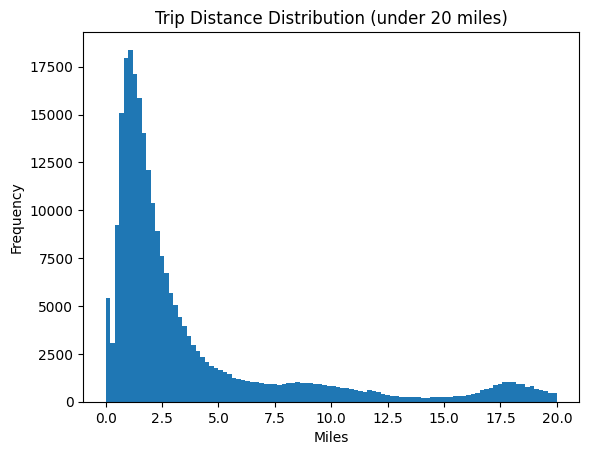

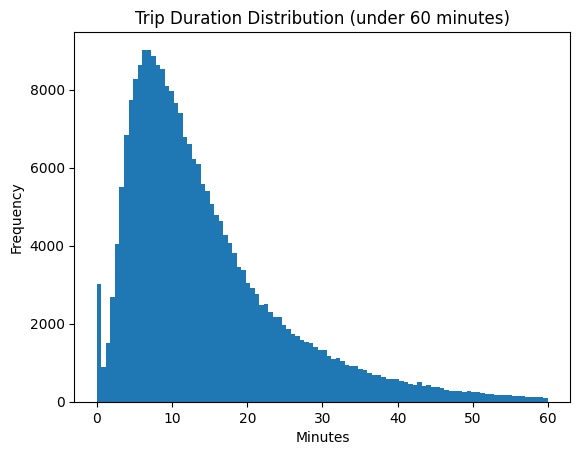

In [26]:
df[df["trip_distance"] < 20]["trip_distance"].plot(
    kind="hist", bins=100, title="Trip Distance Distribution (under 20 miles)"
)
plt.xlabel("Miles")
plt.show()


df[df["trip_duration"] < 60]["trip_duration"].plot(
    kind="hist", bins=100, title="Trip Duration Distribution (under 60 minutes)"
)
plt.xlabel("Minutes")
plt.show()



### Boxplot

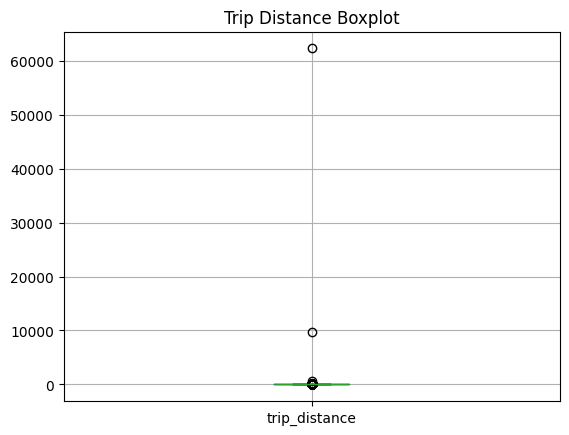

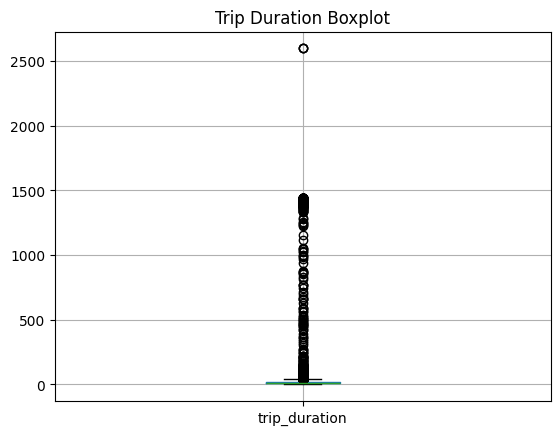

In [19]:
df.boxplot(column="trip_distance")
plt.title("Trip Distance Boxplot")
plt.show()

df.boxplot(column="trip_duration")
plt.title("Trip Duration Boxplot")
plt.show()


### Look for the outlier

In [28]:
outliers = df[(df["trip_distance"] > 60000) | (df["trip_duration"] > 1500)]
outliers.index
df.loc[outliers.index]


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
59232,2023-01-01 18:45:20,2023-01-03 14:01:32,1,3.19,2,38.7,0.0,0.0,0.0,1.0,41.45,0.0,2596.200000
59233,2023-01-01 18:45:20,2023-01-03 14:01:58,1,0.01,4,-3.0,-5.0,0.0,0.0,-1.0,-10.75,0.0,2596.633333
59234,2023-01-01 18:45:20,2023-01-03 14:01:58,1,0.01,4,3.0,5.0,0.0,0.0,1.0,10.75,0.0,2596.633333
62642,2023-01-01 19:40:43,2023-01-01 20:21:48,1,62359.52,2,0.0,0.0,0.0,0.0,0.0,2.50,2.5,41.083333


In [30]:
outliers = df[(df["fare_amount"] < 0)]
outliers.index
df.loc[outliers.index]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
133,2023-01-01 00:28:29,2023-01-01 00:31:03,1,0.42,4,-5.1,-1.0,0.0,0.00,-1.0,-10.1,-2.5,2.566667
264,2023-01-01 00:20:18,2023-01-01 00:27:56,2,1.19,4,-9.3,-1.0,0.0,0.00,-1.0,-14.3,-2.5,7.633333
324,2023-01-01 00:52:22,2023-01-01 01:14:03,1,4.89,4,-25.4,-1.0,0.0,0.00,-1.0,-30.4,-2.5,21.683333
620,2023-01-01 00:06:39,2023-01-01 00:10:02,1,0.52,2,-5.1,-1.0,0.0,0.00,-1.0,-10.1,-2.5,3.383333
923,2023-01-01 00:34:39,2023-01-01 00:40:25,2,0.85,4,-7.2,-1.0,0.0,0.00,-1.0,-12.2,-2.5,5.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254092,2023-01-04 13:31:44,2023-01-04 13:32:00,1,0.03,2,-3.0,0.0,0.0,0.00,-1.0,-7.0,-2.5,0.266667
254391,2023-01-04 13:27:27,2023-01-04 13:37:01,1,1.44,4,-11.4,0.0,0.0,0.00,-1.0,-15.4,-2.5,9.566667
254654,2023-01-04 13:50:24,2023-01-04 14:31:53,1,11.20,4,-70.0,0.0,0.0,-6.55,-1.0,-81.8,-2.5,41.483333
254702,2023-01-04 13:58:01,2023-01-04 14:02:36,1,0.64,4,-6.5,0.0,0.0,0.00,-1.0,-10.5,-2.5,4.583333
